<a href="https://colab.research.google.com/github/N786h/MachineLearning/blob/main/Knn_and_Meshgrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KNN

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load the dataset from github

In [2]:
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/campusx-official/K-Nearest-Neighbors/master/Social_Network_Ads.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

data = pd.read_csv(data)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Seregate the data into X & y

In [3]:
X = data.iloc[:,2:4].values
y = data.iloc[:,-1].values

#### Spltit the dataset into train and test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Normalize the dataset

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Train the dataset

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

#### Predict the dataset

In [7]:
y_pred = knn.predict(X_test)

#### Accuracy measure

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9375

#### Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[48,  4],
       [ 1, 27]])

#### Elbo method to find the best value of k

In [10]:
error_train=[]
error_test=[]

for i in range(1, 26):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  x=confusion_matrix(y_train, knn.predict(X_train))
  y=confusion_matrix(y_test, knn.predict(X_test))
  error_train.append((x[0][1]+x[1][0])/x.sum())
  error_test.append((y[0][1]+y[1][0])/y.sum())

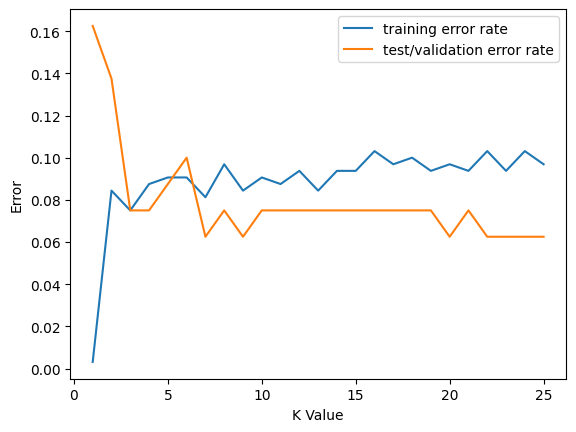

In [11]:
plt.plot(range(1,26), error_train, label='training error rate')
plt.plot(range(1,26), error_test, label='test/validation error rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

#### Predict with new value 

In [12]:
def predict_output():
  age=int(input("Enter the age: "))
  salary=int(input("Enter the salary: "))
  
  X_new=np.array([[age], [salary]]).reshape(1,2)
  X_new=scaler.transform(X_new)

  if knn.predict(X_new)[0]==0:
    return "Will not purchase"
  else:
    return "Will purchase"

In [13]:
predict_output()

Enter the age: 25
Enter the salary: 25000


'Will not purchase'

### Decision Boundary for Knn

#### Creating a meshgrid

In [14]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)
XX, YY=np.meshgrid(a,b)

#### Classifiying the each point on the meshgrid

In [15]:
input_array=np.array([XX.ravel(), YY.ravel()]).T
labels=knn.predict(input_array)

#### Plotting the array as an image

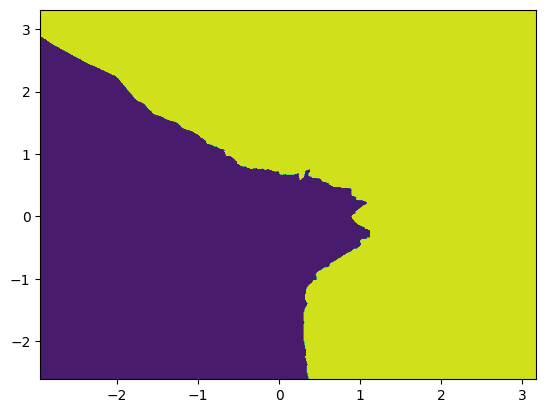

In [16]:
plt.contourf(XX, YY, labels.reshape(XX.shape))

#### Plotting all the training data on the plot

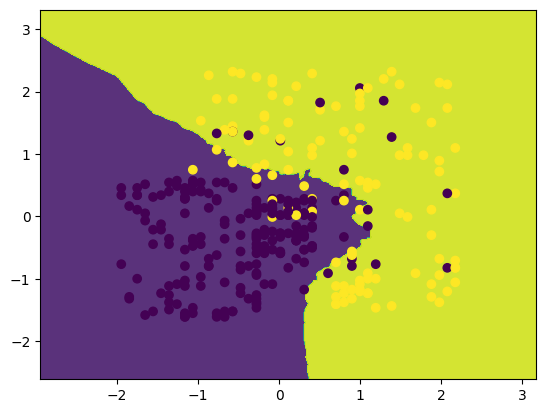

In [17]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.9)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)

#### Effect of K on Decision Boundary

In [18]:
from sklearn.neighbors import KNeighborsClassifier

def keffect(data, k):
  X=data.iloc[:,:2].values
  y=data.iloc[:,-1].values

  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X,y)

  a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
  a=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)

  XX, YY=np.meshgrid(a, b)
  input_array=np.array([XX.ravel(), YY.ravel()]).T
  labels=knn.predict(input_array)

  plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y)

#### Dataset1: Ushape

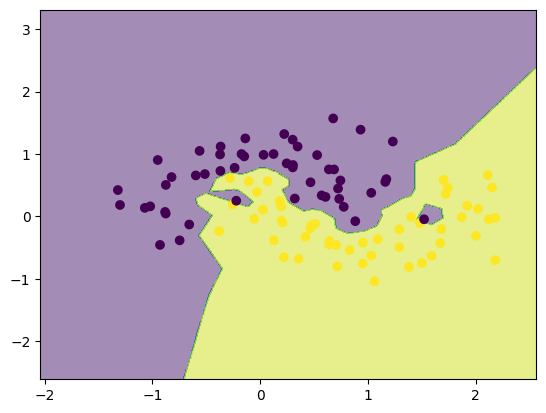

In [19]:
url = "https://raw.githubusercontent.com/campusx-official/K-Nearest-Neighbors/master/toy_datasets/ushape.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

data = pd.read_csv(data)
keffect(data, 1)

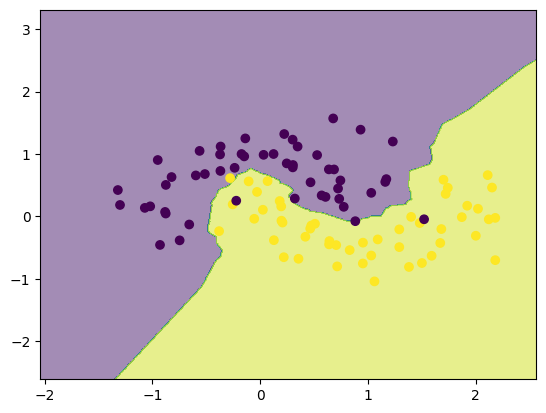

In [20]:
keffect(data, 5)

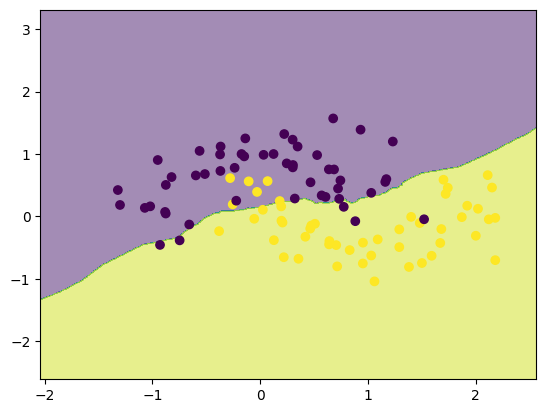

In [21]:
keffect(data, 35)

#### Dataset 2: Linear Seperation

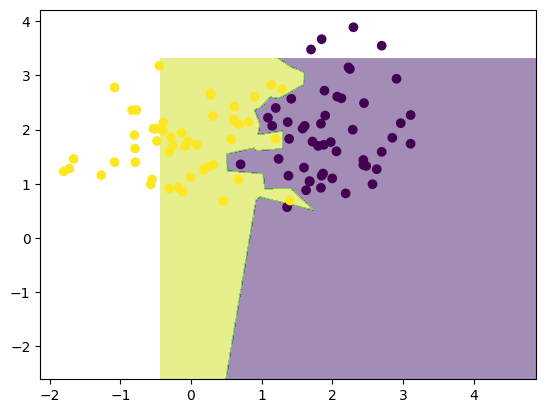

In [22]:
url = "https://raw.githubusercontent.com/campusx-official/K-Nearest-Neighbors/master/toy_datasets/linearsep.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

data = pd.read_csv(data)
keffect(data, 1)

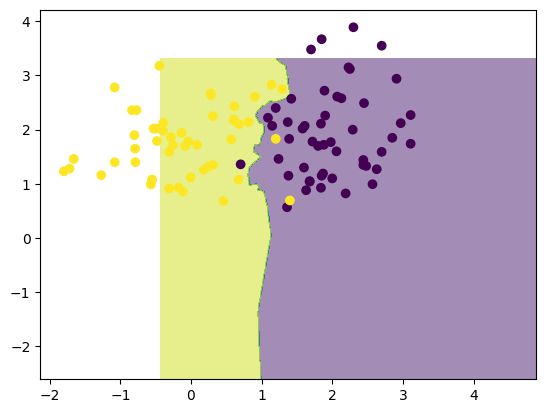

In [23]:
keffect(data, 5)

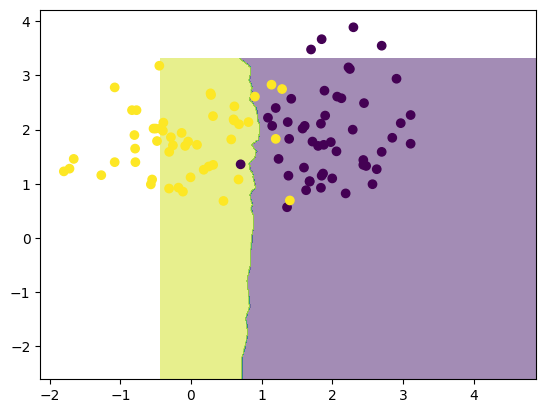

In [24]:
keffect(data, 35)

#### Dataset 3: Concentric Circles

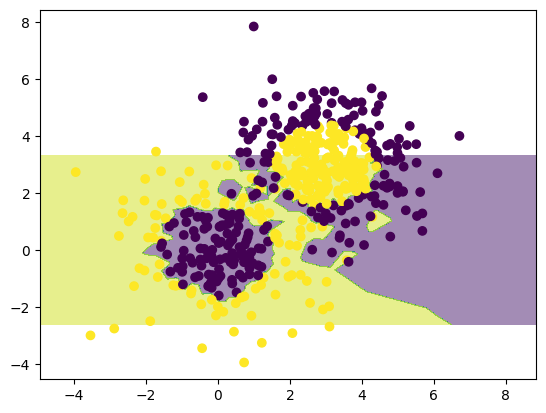

In [25]:
url = "https://raw.githubusercontent.com/campusx-official/K-Nearest-Neighbors/master/toy_datasets/concertriccir2.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

data = pd.read_csv(data)
keffect(data, 1)

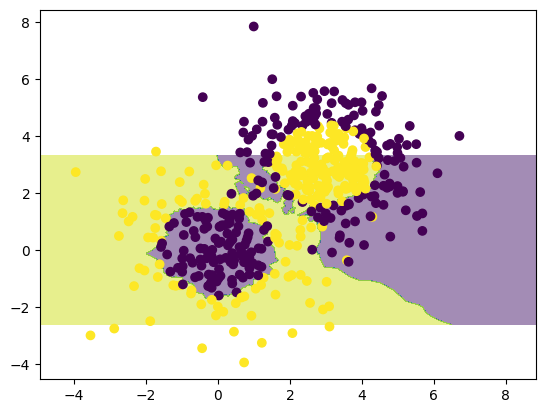

In [26]:
keffect(data, 5)

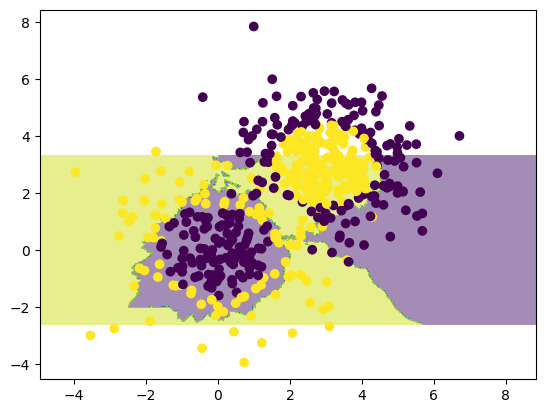

In [27]:
keffect(data, 35)

#### Dataset 4: XOR

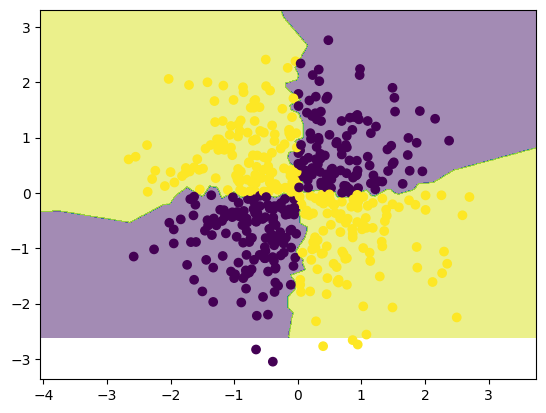

In [28]:
url = "https://raw.githubusercontent.com/campusx-official/K-Nearest-Neighbors/master/toy_datasets/xor.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

data = pd.read_csv(data)
keffect(data, 1)

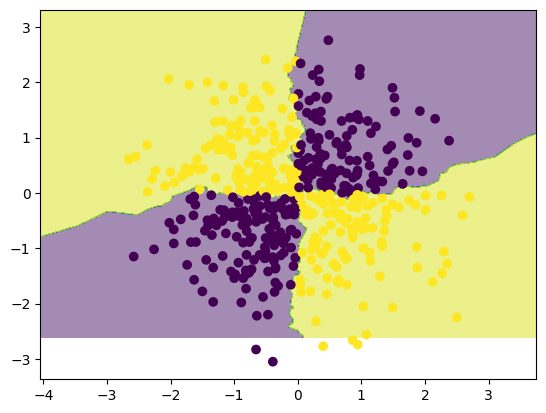

In [29]:
keffect(data, 5)

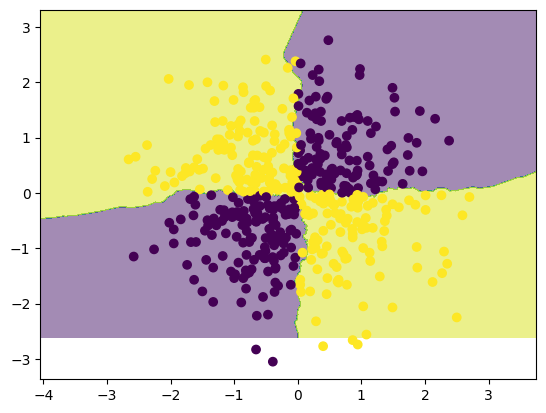

In [30]:
keffect(data, 35)

#### Dataset 5: Two Spirals

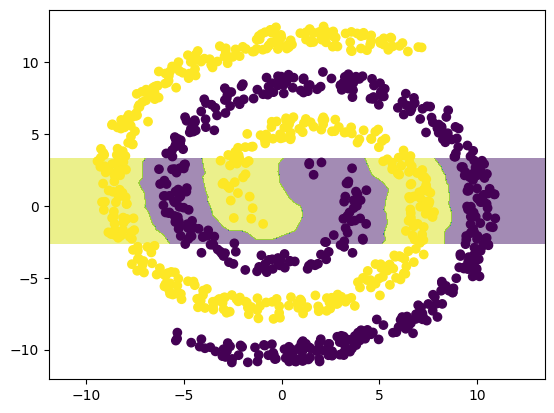

In [31]:
url = "https://raw.githubusercontent.com/campusx-official/K-Nearest-Neighbors/master/toy_datasets/twoSpirals.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

data = pd.read_csv(data)
keffect(data, 1)